In [97]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt# doctest: +SKIP
import seaborn as sns
%matplotlib inline

In [98]:
#Reading the dataset
data=pd.read_csv('Project_dataset.csv')
#Value to be predicted by the model.
y=data.Label
#Input taken by the model.
X=data.drop(['Label'],axis=1)
data.head()

,LV,M,Speed,Visual,Audio,Survey_Score,Label
0,1.00,1.0,1,1.0,1.0,1.00,3
1,1.00,1.0,1,1.0,1.0,0.95,3
2,1.00,1.0,1,1.0,1.0,0.90,3
3,1.00,1.0,1,1.0,1.0,0.85,3
4,0.85,1.0,1,1.0,1.0,1.00,3


In [99]:
#The following test cases will be used to check the values given by each model.
test1 = np.array([[0.71,1,0,0.75,1,0.65]]) #Readings for applicant 1.
test2 = np.array([[0.28,0.5,1,0.25,1,0.3]]) #Readings for applicant 2.
test3 = np.array([[0.57,0,0,0.5,0.5,0.45]]) #Readings for applicant 3.
test4 = np.array([[0.42,0.5,0,0.5,0.5,0.05]]) #Readings for applicant 4.

In [100]:
#Creating the test and train data sets for the given data.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.8,random_state=10)
#list te precision values of each model.
precision = [0, 0, 0, 0, 0, 0, 0]
#list to store recall values of each model.
recall = [0, 0, 0, 0, 0, 0, 0]
#list to store f1-score values of each model.
fscore = [0, 0, 0, 0, 0, 0, 0]
#list to store error in predictions of each model.
error = [.0, .0, .0, .0, .0, .0, .0]

In [101]:
#StandardScalar is used for preprocessing of data.
#'copy' is False, which means copies are avoid and inplace scaling is done instead.
sc=StandardScaler(copy=False)
sc.fit_transform(X_train)
sc.transform(X_test)

array([[ 0.41116739,  1.08991867,  1.03703491,  0.5971629 ,  0.83675148,
         0.81888678],
       [ 1.03453021, -0.40611619,  1.03703491,  0.5971629 ,  0.83675148,
        -0.3220837 ],
       [-1.50344699, -1.90215105, -0.96428769, -1.24124575,  0.83675148,
         0.49289521],
       ...,
       [-1.50344699, -0.40611619, -0.96428769, -0.32204142,  0.83675148,
        -0.3220837 ],
       [-1.50344699, -0.40611619, -0.96428769, -2.16045008,  0.83675148,
        -0.3220837 ],
       [-0.21219543, -0.40611619,  1.03703491,  0.5971629 ,  0.83675148,
         1.30787412]])

In [102]:
#Creating lists of label outputs given in each test case by different models
label_1 = [0, 0, 0, 0, 0, 0, 0]
label_2 = [0, 0, 0, 0, 0, 0, 0]
label_3 = [0, 0, 0, 0, 0, 0, 0]
label_4 = [0, 0, 0, 0, 0, 0, 0]

Decision Tree

In [103]:
#Creating the DecisionTree model.
dt = DecisionTreeClassifier(random_state = 1)
#Training the model.
dt.fit(X_train,y_train)
#Making predictions using the decision tree model.
pred_dt = dt.predict(X_test)
#Calculating error
error[0] = round(mean_absolute_error(y_test, pred_dt), 3)

In [104]:
#Testing the model with predefined test cases.
ans_1 = dt.predict((test1))
ans_2 = dt.predict((test2))
ans_3 = dt.predict((test3))
ans_4 = dt.predict((test4))

#Storing the above predictions into respective lists.
label_1[0] = ans_1[0]
label_2[0] = ans_2[0]
label_3[0] = ans_3[0]
label_4[0] = ans_4[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [105]:
print(classification_report(y_test,pred_dt)) #Classification report

              precision    recall  f1-score   support

           1       0.95      0.78      0.85       282
           2       0.94      0.96      0.95      3051
           3       0.94      0.94      0.94      1842

    accuracy                           0.94      5175
   macro avg       0.95      0.89      0.92      5175
weighted avg       0.94      0.94      0.94      5175



**Random** Forest Classifier

In [106]:
#Creating the RandomClassifier model.
rf = RandomForestClassifier(random_state = 0)
#Training the model.
rf.fit(X_train, y_train)
#Making predictions using the model.
pred_rf = rf.predict(X_test)
#Calculating error
error[1] = round(mean_absolute_error(y_test, pred_rf), 3)

In [107]:
#Testing the model with predefined test cases.
ans_1 = rf.predict((test1))
ans_2 = rf.predict((test2))
ans_3 = rf.predict((test3))
ans_4 = rf.predict((test4))

#Storing the above predictions into respective lists.
label_1[1] = ans_1[0]
label_2[1] = ans_2[0]
label_3[1] = ans_3[0]
label_4[1] = ans_4[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [108]:
print(classification_report(y_test,pred_rf)) #Classification report

              precision    recall  f1-score   support

           1       0.98      0.75      0.85       282
           2       0.95      0.98      0.97      3051
           3       0.97      0.96      0.97      1842

    accuracy                           0.96      5175
   macro avg       0.97      0.90      0.93      5175
weighted avg       0.96      0.96      0.96      5175



SVM

In [109]:
#Creating the SVM model.
svm = SVC(kernel = "linear")
#Training the model.
svm.fit(X_train, y_train)
#Making predictions using the model.
pred_svm = svm.predict(X_test)
#Calculating error
error[2] = round(mean_absolute_error(y_test, pred_svm), 3)

In [110]:
#Testing the model with predefined test cases.
ans_1 = svm.predict((test1))
ans_2 = svm.predict((test2))
ans_3 = svm.predict((test3))
ans_4 = svm.predict((test4))

#Storing the above predictions into respective lists.
label_1[2] = ans_1[0]
label_2[2] = ans_2[0]
label_3[2] = ans_3[0]
label_4[2] = ans_4[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [111]:
print(classification_report(y_test,pred_svm)) #Classification report

              precision    recall  f1-score   support

           1       1.00      0.61      0.75       282
           2       0.94      0.99      0.96      3051
           3       0.98      0.96      0.97      1842

    accuracy                           0.96      5175
   macro avg       0.97      0.85      0.90      5175
weighted avg       0.96      0.96      0.95      5175



RandomForest model with GridSearch

In [112]:
#Creating a list of possible n_estimators.
n_est = {'n_estimators' : [10,100,500,1000]}
#Creating a RandomForest model using the value of n_estimators given by GridSearch for best result.
rf_grid = GridSearchCV(RandomForestClassifier(random_state=0),n_est,scoring='f1_macro')
#Training the model
rf_grid.fit(X_train, y_train)
#Making predictions using the model.
pred_rf_grid = rf_grid.predict(X_test)
#Printing the value of n_estimator used in the model.
#This value provides the most accurate predictions for our dataset.
print('Best value of n_estimator for RandomForest model is:')
print(rf_grid.best_params_)
#Calculating error
error[3] = round(mean_absolute_error(y_test, pred_rf_grid), 3)

Best value of n_estimator for RandomForest model is:
{'n_estimators': 10}


In [113]:
#Testing the model with predefined test cases.
ans_1 = rf_grid.predict((test1))
ans_2 = rf_grid.predict((test2))
ans_3 = rf_grid.predict((test3))
ans_4 = rf_grid.predict((test4))

#Storing the above predictions into respective lists.
label_1[3] = ans_1[0]
label_2[3] = ans_2[0]
label_3[3] = ans_3[0]
label_4[3] = ans_4[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [114]:
print(classification_report(y_test,pred_rf_grid)) #Classification report

              precision    recall  f1-score   support

           1       0.96      0.76      0.85       282
           2       0.95      0.98      0.96      3051
           3       0.97      0.94      0.96      1842

    accuracy                           0.96      5175
   macro avg       0.96      0.90      0.92      5175
weighted avg       0.96      0.96      0.95      5175



SVM model with GridSearch

In [115]:
#options_parameters is a list of dictionaries to find the most suitable values of 'kernel', 'gamma' and 'C' for the given model.
options_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
#Creating SVM model with the most suitable parameters obtained by using GridSearch.
svm_grid = GridSearchCV(SVC(), options_parameters,scoring='f1_macro')
#Training the model.
svm_grid.fit(X_train, y_train)
#Making predictions using the model.
pred_svm_grid = svm_grid.predict(X_test)
#Printing the values of 'C', 'gamma' and 'kernel' used in our model.
#These values provide the most accurate predictions for the given dataset.
print('Best parameters of SVM model are:')
print(svm_grid.best_params_)
#Calculating error
error[4] = round(mean_absolute_error(y_test, pred_svm_grid), 3)

Best parameters of SVM model are:
{'C': 1000, 'kernel': 'linear'}


In [116]:
#Testing the model with predefined test cases.
ans_1 = svm_grid.predict((test1))
ans_2 = svm_grid.predict((test2))
ans_3 = svm_grid.predict((test3))
ans_4 = svm_grid.predict((test4))

#Storing the above predictions into respective lists.
label_1[4] = ans_1[0]
label_2[4] = ans_2[0]
label_3[4] = ans_3[0]
label_4[4] = ans_4[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [117]:
print(classification_report(y_test,pred_svm_grid)) #Classification report

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       282
           2       1.00      1.00      1.00      3051
           3       1.00      1.00      1.00      1842

    accuracy                           1.00      5175
   macro avg       1.00      1.00      1.00      5175
weighted avg       1.00      1.00      1.00      5175



Naive Bayes

In [118]:
#Creating the Naive Bayes model.
nb = GaussianNB()
#Training the model.
nb.fit(X_train,y_train)
#Making predictions using the decision tree model.
pred_nb = nb.predict(X_test)
#Calculating error
error[5] = round(mean_absolute_error(y_test, pred_nb), 3)

In [119]:
#Testing the model with predefined test cases.
ans_1 = nb.predict((test1))
ans_2 = nb.predict((test2))
ans_3 = nb.predict((test3))
ans_4 = nb.predict((test4))

#Storing the above predictions into respective lists.
label_1[5] = ans_1[0]
label_2[5] = ans_2[0]
label_3[5] = ans_3[0]
label_4[5] = ans_4[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [120]:
print(classification_report(y_test,pred_nb)) #Classification report

              precision    recall  f1-score   support

           1       0.84      0.67      0.74       282
           2       0.85      0.95      0.90      3051
           3       0.92      0.78      0.84      1842

    accuracy                           0.87      5175
   macro avg       0.87      0.80      0.83      5175
weighted avg       0.87      0.87      0.87      5175



Gradient Boosting

In [121]:
#Creating the GradientBoosting model.
gb = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
#Training the model.
gb.fit(X_train,y_train)
#Making predictions using the GradientBoosting model.
pred_gb = gb.predict(X_test)
#Calculating error
error[6] = round(mean_absolute_error(y_test, pred_gb), 3)

In [122]:
#Testing the model with predefined test cases.
ans_1 = gb.predict((test1))
ans_2 = gb.predict((test2))
ans_3 = gb.predict((test3))
ans_4 = gb.predict((test4))

#Storing the above predictions into respective lists.
label_1[6] = ans_1[0]
label_2[6] = ans_2[0]
label_3[6] = ans_3[0]
label_4[6] = ans_4[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [123]:
print(classification_report(y_test,pred_gb)) #Classification report

              precision    recall  f1-score   support

           1       0.92      0.60      0.73       282
           2       0.91      0.98      0.94      3051
           3       0.96      0.90      0.93      1842

    accuracy                           0.93      5175
   macro avg       0.93      0.82      0.87      5175
weighted avg       0.93      0.93      0.92      5175



Comparing Errors of different models

In [124]:
#list of models
models = ['DecisionTree', 'RandomForest','SVM\t', 'RandomForest\n(GridSearch)', 'SVM\n(GridSearch)', 'Naive Bayes', 'Gradient\nBoosting']
print('Model\t\tError')
for i in range(7):
    print('{}\t{}'.format(models[i],error[i]))

Model		Error
DecisionTree	0.055
RandomForest	0.039
SVM		0.043
RandomForest
(GridSearch)	0.044
SVM
(GridSearch)	0.001
Naive Bayes	0.13
Gradient
Boosting	0.073


In [125]:
#From the above result, we can observe that the error is maximum in Naive Bayes.
#Error is minimum in SVM (GridSearch).
#We can't decide the best model for the given dataset only on the basis of error.
#In order to find the best fit, we need to consider precision and recall as well.

Comparing Results of Different models

In [126]:
#Printing label lists
print(label_1)
print(label_2)
print(label_3)
print(label_4)

[3, 3, 3, 3, 3, 2, 3]
[2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 1, 2, 2, 2]
[2, 2, 2, 2, 1, 2, 2]


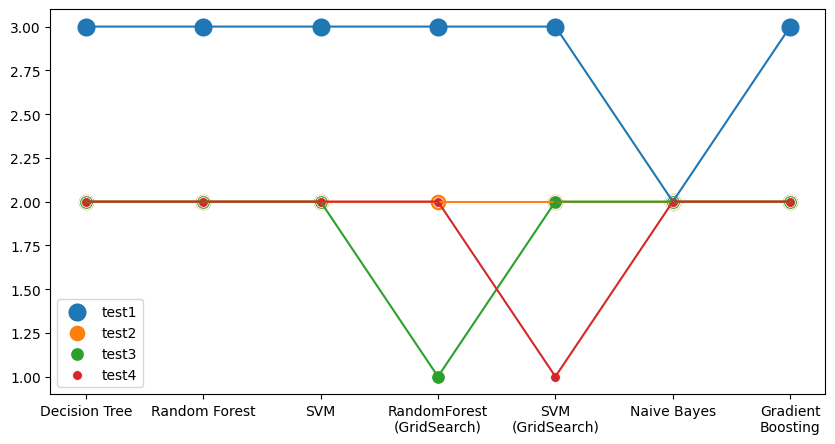

In [127]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = ['Decision Tree', 'Random Forest','SVM', 'RandomForest\n(GridSearch)', 'SVM\n(GridSearch)','Naive Bayes', 'Gradient\nBoosting'],
                y = label_1, s = 200, label = 'test1',)
sns.scatterplot(x = ['Decision Tree', 'Random Forest','SVM', 'RandomForest\n(GridSearch)', 'SVM\n(GridSearch)','Naive Bayes', 'Gradient\nBoosting'],
                y = label_2, s = 150, label = 'test2')
sns.scatterplot(x = ['Decision Tree', 'Random Forest','SVM', 'RandomForest\n(GridSearch)', 'SVM\n(GridSearch)','Naive Bayes', 'Gradient\nBoosting'],
                y = label_3, s = 100, label = 'test3')
sns.scatterplot(x = ['Decision Tree', 'Random Forest','SVM', 'RandomForest\n(GridSearch)', 'SVM\n(GridSearch)','Naive Bayes', 'Gradient\nBoosting'],
                y = label_4, s = 50, label = 'test4')
sns.lineplot(x = ['Decision Tree', 'Random Forest','SVM', 'RandomForest\n(GridSearch)', 'SVM\n(GridSearch)','Naive Bayes', 'Gradient\nBoosting'],
                y = label_1)
sns.lineplot(x = ['Decision Tree', 'Random Forest','SVM', 'RandomForest\n(GridSearch)', 'SVM\n(GridSearch)','Naive Bayes', 'Gradient\nBoosting'],
                y = label_2)
sns.lineplot(x = ['Decision Tree', 'Random Forest','SVM', 'RandomForest\n(GridSearch)', 'SVM\n(GridSearch)','Naive Bayes', 'Gradient\nBoosting'],
                y = label_3)
sns.lineplot(x = ['Decision Tree', 'Random Forest','SVM', 'RandomForest\n(GridSearch)', 'SVM\n(GridSearch)','Naive Bayes', 'Gradient\nBoosting'],
                y = label_4)
plt.show()

Confusion Matrices of different models

In [128]:
#Confusion matrix for Decision tree model.
cm_dt=confusion_matrix(np.array(y_test), pred_dt)
print(cm_dt)
ConfusionMatrixDisplay(cm_dt)
plt.show()
#Finding precision, recall and f-score for Decision Tree Model and updating values in respective lists.
precision[0], recall[0], fscore[0], Nil = precision_recall_fscore_support(y_test, pred_dt, average='macro')
print('For a DecisionTreeClassifier:  Precision = %.3f, Recall = %.3f, F1-score = %.3f'%(precision[0], recall[0], fscore[0]))

[[ 219   63    0]
 [  12 2937  102]
 [   0  108 1734]]
For a DecisionTreeClassifier:  Precision = 0.946, Recall = 0.894, F1-score = 0.917


[Text(0.5, 1.0, 'Confusion Matrix for Dyslexia with Decision Tree model'),
 Text(0.5, 0, 'Predicted outcome'),
 Text(0, 0.5, 'Actual outcome')]

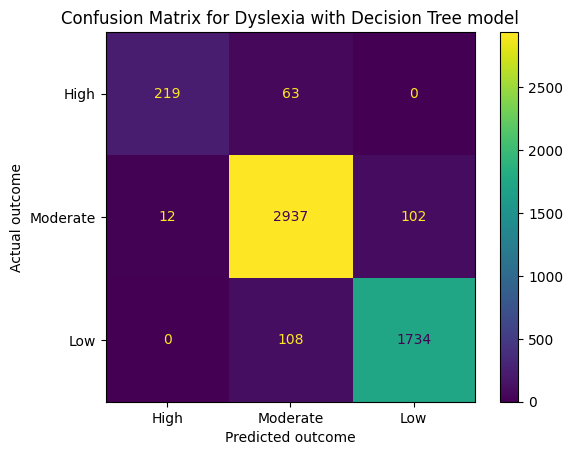

In [129]:
cmd_obj = ConfusionMatrixDisplay(cm_dt, display_labels=["High","Moderate","Low"])
cmd_obj.plot()
cmd_obj.ax_.set(title='Confusion Matrix for Dyslexia with Decision Tree model',
                xlabel='Predicted outcome',
                ylabel='Actual outcome')

In [130]:
#Confusion matrix for RandomForest model.
cm_rf=confusion_matrix(np.array(y_test), pred_rf)
print(cm_rf)
ConfusionMatrixDisplay(cm_rf)
plt.show()
#Finding precision, recall and f-score for RandomForest Model and updating values in respective lists.
precision[1], recall[1], fscore[1], Nil = precision_recall_fscore_support(y_test, pred_rf, average='macro')
print('For a RandomForestClassifier:  Precision = %.3f, Recall = %.3f, F1-score = %.3f'%(precision[1], recall[1], fscore[1]))

[[ 212   70    0]
 [   4 2995   52]
 [   0   75 1767]]
For a RandomForestClassifier:  Precision = 0.969, Recall = 0.898, F1-score = 0.928


[Text(0.5, 1.0, 'Confusion Matrix for Dyslexia with Random Forest model'),
 Text(0.5, 0, 'Predicted outcome'),
 Text(0, 0.5, 'Actual outcome')]

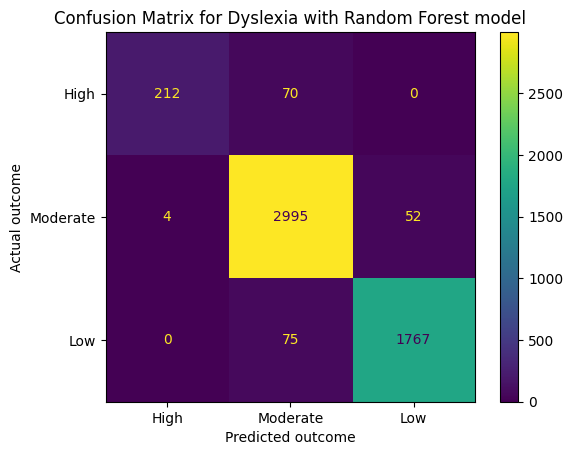

In [131]:
cmd_obj = ConfusionMatrixDisplay(cm_rf, display_labels=["High","Moderate","Low"])
cmd_obj.plot()
cmd_obj.ax_.set(title='Confusion Matrix for Dyslexia with Random Forest model',
                xlabel='Predicted outcome',
                ylabel='Actual outcome')

In [132]:
#Confusion matrix for SVM model
cm_svm=confusion_matrix(np.array(y_test), pred_svm)
print(cm_svm)
ConfusionMatrixDisplay(cm_svm)
plt.show()
#Finding precision, recall and f-score for SVM model and updating values in respective lists.
precision[2], recall[2], fscore[2], Nil = precision_recall_fscore_support(y_test, pred_svm, average='macro')
print('For a SVM model:  Precision = %.3f, Recall = %.3f, F1-score = %.3f'%(precision[2], recall[2], fscore[2]))

[[ 171  111    0]
 [   0 3017   34]
 [   0   77 1765]]
For a SVM model:  Precision = 0.974, Recall = 0.851, F1-score = 0.896


[Text(0.5, 1.0, 'Confusion Matrix for Dyslexia with SVM model'),
 Text(0.5, 0, 'Predicted outcome'),
 Text(0, 0.5, 'Actual outcome')]

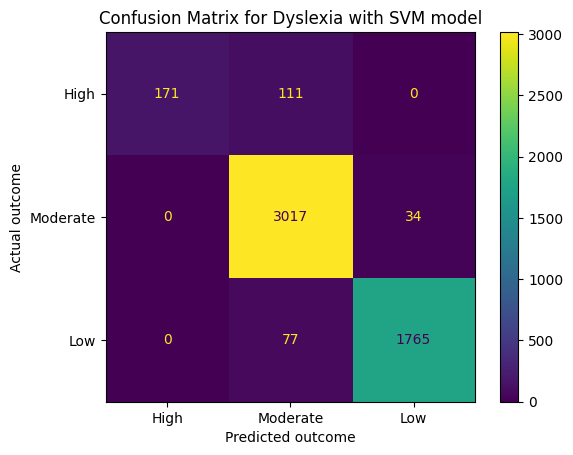

In [133]:
cmd_obj = ConfusionMatrixDisplay(cm_svm, display_labels=["High","Moderate","Low"])
cmd_obj.plot()
cmd_obj.ax_.set(title='Confusion Matrix for Dyslexia with SVM model',
                xlabel='Predicted outcome',
                ylabel='Actual outcome')

In [134]:
#Confusion matrix for RandomForest model using GridSearch
cm_rf_grid=confusion_matrix(np.array(y_test), pred_rf_grid)
print(cm_rf_grid)
ConfusionMatrixDisplay(cm_rf_grid)
plt.show()
#Finding precision, recall and f-score for RandomForest (GridSearch) model and updating values in respective lists.
precision[3], recall[3], fscore[3], Nil = precision_recall_fscore_support(y_test, pred_rf_grid, average='macro')
print('For a RandomForest model with GridSearch:  Precision = %.3f, Recall = %.3f, F1-score = %.3f'%(precision[3], recall[3], fscore[3]))

[[ 215   67    0]
 [  10 2994   47]
 [   0  106 1736]]
For a RandomForest model with GridSearch:  Precision = 0.958, Recall = 0.895, F1-score = 0.923


[Text(0.5, 1.0, 'Confusion Matrix for Dyslexia with Random Forest model using GridSearch'),
 Text(0.5, 0, 'Predicted outcome'),
 Text(0, 0.5, 'Actual outcome')]

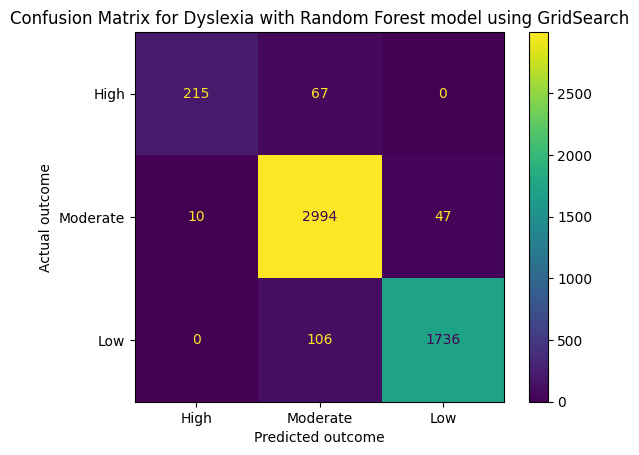

In [135]:
cmd_obj = ConfusionMatrixDisplay(cm_rf_grid, display_labels=["High","Moderate","Low"])
cmd_obj.plot()
cmd_obj.ax_.set(title='Confusion Matrix for Dyslexia with Random Forest model using GridSearch',
                xlabel='Predicted outcome',
                ylabel='Actual outcome')

In [136]:
#Confusion matrix for SVM model using GridSearch
cm_svm_grid=confusion_matrix(np.array(y_test), pred_svm_grid)
print(cm_svm_grid)
ConfusionMatrixDisplay(cm_svm_grid)
plt.show()
#Finding precision, recall and f-score for SVM (GridSearch) model and updating values in respective lists.
precision[4], recall[4], fscore[4], Nil = precision_recall_fscore_support(y_test, pred_svm_grid, average='macro')
print('For a SVM model with GridSearch:  Precision = %.3f, Recall = %.3f, F1-score = %.3f'%(precision[4], recall[4], fscore[4]))

[[ 280    2    0]
 [   2 3049    0]
 [   0    0 1842]]
For a SVM model with GridSearch:  Precision = 0.997, Recall = 0.997, F1-score = 0.997


[Text(0.5, 1.0, 'Confusion Matrix for Dyslexia with SVM model using GridSearch'),
 Text(0.5, 0, 'Predicted outcome'),
 Text(0, 0.5, 'Actual outcome')]

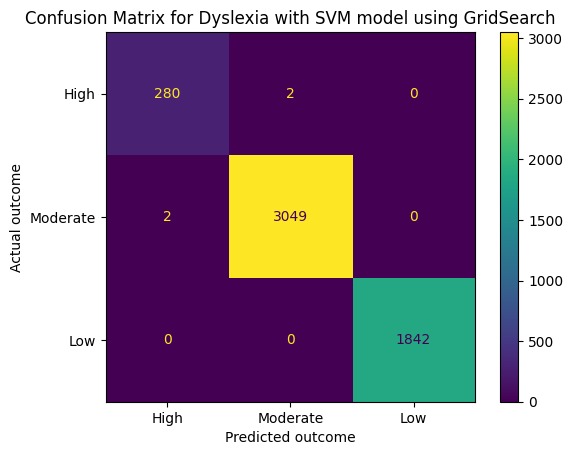

In [137]:
cmd_obj = ConfusionMatrixDisplay(cm_svm_grid, display_labels=["High","Moderate","Low"])
cmd_obj.plot()
cmd_obj.ax_.set(title='Confusion Matrix for Dyslexia with SVM model using GridSearch',
                xlabel='Predicted outcome',
                ylabel='Actual outcome')

In [138]:
#Confusion matrix for Naive Bayes model using GridSearch
cm_nb=confusion_matrix(np.array(y_test), pred_nb)
print(cm_nb)
ConfusionMatrixDisplay(cm_nb)
plt.show()
#Finding precision, recall and f-score for Naive Bayes model and updating values in respective lists.
precision[5], recall[5], fscore[5], Nil = precision_recall_fscore_support(y_test, pred_nb, average='macro')
print('For a Naive Bayes model:  Precision = %.3f, Recall = %.3f, F1-score = %.3f'%(precision[5], recall[5], fscore[5]))

[[ 188   94    0]
 [  37 2888  126]
 [   0  414 1428]]
For a Naive Bayes model:  Precision = 0.868, Recall = 0.796, F1-score = 0.826


[Text(0.5, 1.0, 'Confusion Matrix for Dyslexia with Naive Bayes'),
 Text(0.5, 0, 'Predicted outcome'),
 Text(0, 0.5, 'Actual outcome')]

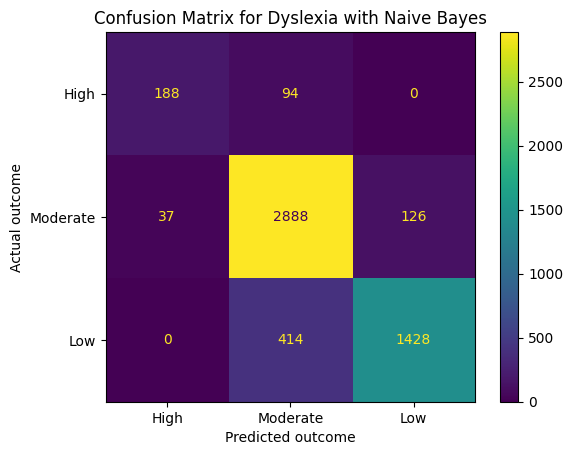

In [139]:
cmd_obj = ConfusionMatrixDisplay(cm_nb, display_labels=["High","Moderate","Low"])
cmd_obj.plot()
cmd_obj.ax_.set(title='Confusion Matrix for Dyslexia with Naive Bayes',
                xlabel='Predicted outcome',
                ylabel='Actual outcome')

In [140]:
#Confusion matrix for Gradient Boosting model
cm_gb=confusion_matrix(np.array(y_test), pred_gb)
print(cm_gb)
ConfusionMatrixDisplay(cm_gb)
plt.show()
#Finding precision, recall and f-score for Gradient Boosting model and updating values in respective lists.
precision[6], recall[6], fscore[6], Nil = precision_recall_fscore_support(y_test, pred_gb, average='macro')
print('For a Gradient Boosting model:  Precision = %.3f, Recall = %.3f, F1-score = %.3f'%(precision[6], recall[6], fscore[6]))

[[ 169  113    0]
 [  14 2975   62]
 [   0  190 1652]]
For a Gradient Boosting model:  Precision = 0.932, Recall = 0.824, F1-score = 0.865


[Text(0.5, 1.0, 'Confusion Matrix for Dyslexia with Gradient Boosting'),
 Text(0.5, 0, 'Predicted outcome'),
 Text(0, 0.5, 'Actual outcome')]

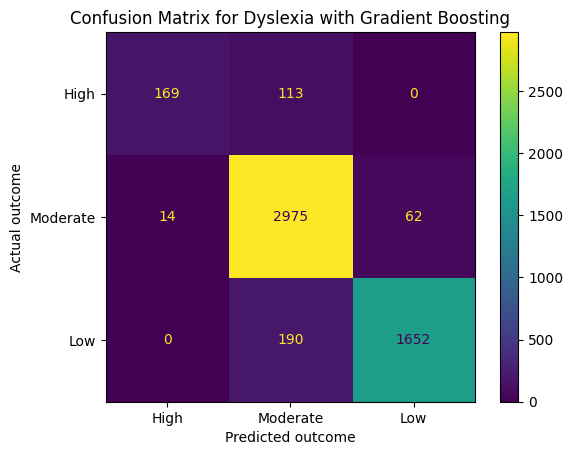

In [141]:
cmd_obj = ConfusionMatrixDisplay(cm_gb, display_labels=["High","Moderate","Low"])
cmd_obj.plot()
cmd_obj.ax_.set(title='Confusion Matrix for Dyslexia with Gradient Boosting',
                xlabel='Predicted outcome',
                ylabel='Actual outcome')

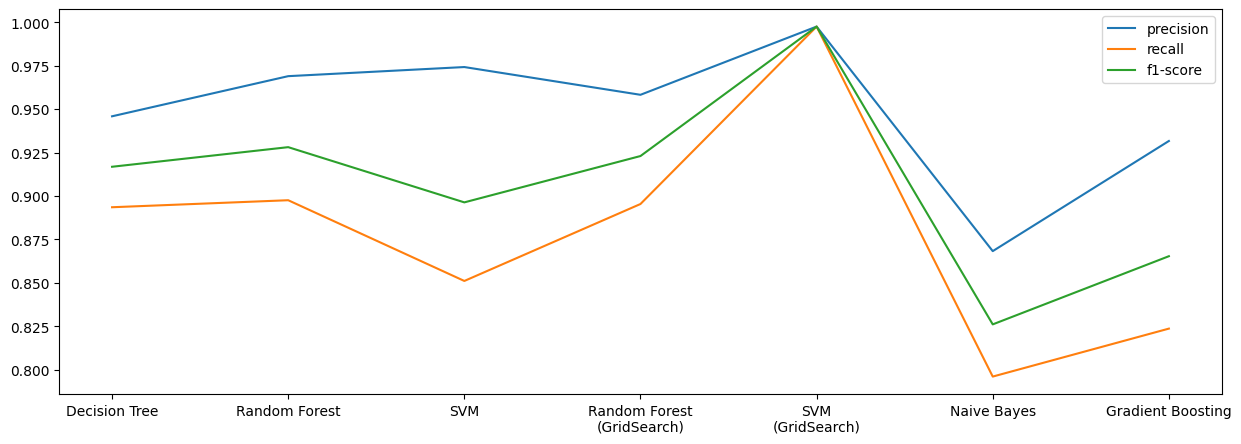

In [142]:
#Creating a line plot to compare teh precision, recall and f1-score of all the models.
#This graph is plotted to find the best fit for our dataset.
plt.figure(figsize=(15,5))
sns.lineplot(x = ['Decision Tree', 'Random Forest','SVM', 'Random Forest\n(GridSearch)', 'SVM\n(GridSearch)','Naive Bayes', 'Gradient Boosting'],
             y = precision,label = 'precision')
sns.lineplot(x = ['Decision Tree', 'Random Forest','SVM', 'Random Forest\n(GridSearch)', 'SVM\n(GridSearch)','Naive Bayes', 'Gradient Boosting'],
             y = recall,label = 'recall')
sns.lineplot(x = ['Decision Tree', 'Random Forest','SVM', 'Random Forest\n(GridSearch)', 'SVM\n(GridSearch)','Naive Bayes', 'Gradient Boosting'],
             y = fscore,label = 'f1-score')
plt.show()

In [143]:
#From the above plot, we can see that the SVM model with GridSearch is the best fit for the given dataset.

Making Predictions with best fit model

In [144]:
#Therefore the most accurate results for all the applicants are as follows.
possibility = {1: "High", 2: "Moderate", 3: "Low"}
print('Applicant\tLabel\tPossibility of Dyslexia')
print('1\t\t{}\t\t{}'.format(label_1[4], possibility[label_1[4]]))
print('2\t\t{}\t\t{}'.format(label_2[4], possibility[label_2[4]]))
print('3\t\t{}\t\t{}'.format(label_3[4], possibility[label_3[4]]))
print('4\t\t{}\t\t{}'.format(label_4[4], possibility[label_4[4]]))

Applicant	Label	Possibility of Dyslexia
1		3		Low
2		2		Moderate
3		2		Moderate
4		1		High
